In [0]:

# Code to read csv file into colaboratory:# Code  
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'10Xf2Xv_pfnIycH2HpNZR3SwWHiHdrqzX'}) # replace the id with id of file you want to access
downloaded.GetContentFile('handwritten.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('handwritten.csv')

In [0]:
!pip install -q keras
!pip install -q numpy
!pip install -q sklearn
!pip install -q matplotlib
!pip install -q pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline

from sklearn.model_selection import train_test_split

# Load the Data

In [4]:
# Get the data from the csv file
data = data.values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


# Data Prep

In [5]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

classes = np.unique(Y_train)
num_classes = len(classes)

X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

## Normalization

In [0]:
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_train = (X_train - mean_image)/255
X_test = (X_test - mean_image)/255

In [8]:
from keras.utils import to_categorical

Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)
print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Original Label: 19
One Hot Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0.]


Using TensorFlow backend.


In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


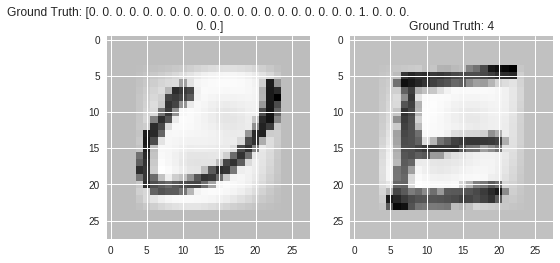

In [10]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()

# Keras Inits

In [0]:
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import LeakyReLU, ELU
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras import initializers
from tensorflow.python.keras.losses import mean_absolute_error


#Add whatever you need here

In [0]:
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Activation

# Models

In [0]:
batch_size = 128
epochs = 20
num_classes = 26

### [conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]

In [0]:
def model1():
    model = Sequential()
    '''
    initializer: he_normal
    A more recent paper on this topic, Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification by He et al., 
    derives an initialization specifically for ReLU neurons, reaching the conclusion that the variance of neurons 
    in the network should be 2.0/n. This gives the initialization w = np.random.randn(n) * sqrt(2.0/n), 
    and is the current recommendation for use in practice in the specific case of neural networks with ReLU neurons.
    '''
    #convolutional layer
    model.add(Conv2D(kernel_size=7, strides=1, filters=16, padding='same',
                     activation='linear', name='layer_conv1', input_shape=(img_size,img_size,1)))
    #reLU activation
    model.add(LeakyReLU(alpha=0.1))
    #Pooling Layer
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

    model.add(Flatten())
    #Fully-Connected Layer with 128 outputs Adding this in improved scores
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))
    #Fully-Connected Layer with Softmax
    model.add(Dense(num_classes, activation='softmax'))

    '''
    For multiclass classification problems like MNIST, cross entropy is typically used as the loss metric
    '''
    model.compile(optimizer=Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Insert model here

### [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]

In [0]:
def model2():
  optimizer = Adam(lr=1e-3)

  model = Sequential()

  #conv
  #keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
      #dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
      #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
      #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
  model.add(Conv2D(filters=16, kernel_size=8, strides = 1, padding='same', activation='linear',
                   bias_initializer='zeros', input_shape=(img_size,img_size,1)))

  #ReLu
  model.add(LeakyReLU(alpha=0.1))

  #conv2
  model.add(Conv2D(filters=16, kernel_size=8, strides = 2, padding='same', activation='linear',
                   bias_initializer='zeros', input_shape=(img_size,img_size,1)))

  #ReLu
  model.add(LeakyReLU(alpha=0.1))

  #MaxPool
  #keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
  model.add(MaxPooling2D(strides=2, padding='same'))

  #Affine
  model.add(Flatten())

  #keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
      #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
      #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
  #model.add(Dense(56, activation="relu"))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

### [batchnorm-relu-conv]xN -> [affine]xM -> [softmax or SVM]

In [0]:
def model3():
  brc_model = Sequential()

  brc_model.add(BatchNormalization(input_shape=(28, 28, 1)))
  brc_model.add(Activation("relu"))
  brc_model.add(Conv2D(32, kernel_size=(5,5), activation="linear", padding="same"))

  brc_model.add(BatchNormalization())
  brc_model.add(Activation("relu"))
  brc_model.add(Conv2D(64, kernel_size=(5,5), activation="linear", padding="same"))

  brc_model.add(Flatten())

  brc_model.add(Dense(128, activation="relu"))

  brc_model.add(Dense(num_classes, activation='softmax'))
  
  brc_model.compile(optimizer=Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return brc_model
  

# Training

In [0]:
models = []

In [18]:
mod1 = model1()
mod1.summary()
mod1.fit(x=X_train,
          y=Y_train,
          epochs=epochs, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))
models.append(mod1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 16)        800       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total para

238103/238103 [==============================] - 26s 110us/step - loss: 0.2134 - acc: 0.9415 - val_loss: 0.1072 - val_acc: 0.9716
Epoch 2/20
200704/238103 [========================>.....] - ETA: 3s - loss: 0.0907 - acc: 0.9759

238103/238103 [==============================] - 23s 96us/step - loss: 0.0892 - acc: 0.9761 - val_loss: 0.0914 - val_acc: 0.9754
Epoch 3/20
238103/238103 [==============================] - 23s 97us/step - loss: 0.0697 - acc: 0.9809 - val_loss: 0.0757 - val_acc: 0.9798
Epoch 4/20
 13312/238103 [>.............................] - ETA: 20s - loss: 0.0559 - acc: 0.9853

238103/238103 [==============================] - 23s 97us/step - loss: 0.0567 - acc: 0.9844 - val_loss: 0.0683 - val_acc: 0.9820
Epoch 5/20
191872/238103 [=======================>......] - ETA: 4s - loss: 0.0466 - acc: 0.9871

238103/238103 [==============================] - 23s 96us/step - loss: 0.0475 - acc: 0.9869 - val_loss: 0.0682 - val_acc: 0.9821
Epoch 6/20
238103/238103 [==============================] - 23s 96us/step - loss: 0.0397 - acc: 0.9891 - val_loss: 0.0659 - val_acc: 0.9833
Epoch 7/20
 11520/238103 [>.............................] - ETA: 20s - loss: 0.0377 - acc: 0.9911

238103/238103 [==============================] - 23s 96us/step - loss: 0.0347 - acc: 0.9902 - val_loss: 0.0650 - val_acc: 0.9838
Epoch 8/20
191488/238103 [=======================>......] - ETA: 4s - loss: 0.0302 - acc: 0.9916

238103/238103 [==============================] - 23s 96us/step - loss: 0.0302 - acc: 0.9916 - val_loss: 0.0617 - val_acc: 0.9850
Epoch 9/20
238103/238103 [==============================] - 23s 96us/step - loss: 0.0265 - acc: 0.9927 - val_loss: 0.0633 - val_acc: 0.9850
Epoch 10/20
 12032/238103 [>.............................] - ETA: 20s - loss: 0.0252 - acc: 0.9936

238103/238103 [==============================] - 23s 96us/step - loss: 0.0232 - acc: 0.9934 - val_loss: 0.0675 - val_acc: 0.9849
Epoch 11/20
188288/238103 [======================>.......] - ETA: 4s - loss: 0.0211 - acc: 0.9941

238103/238103 [==============================] - 23s 96us/step - loss: 0.0216 - acc: 0.9940 - val_loss: 0.0685 - val_acc: 0.9850
Epoch 12/20
238103/238103 [==============================] - 23s 97us/step - loss: 0.0197 - acc: 0.9946 - val_loss: 0.0639 - val_acc: 0.9865
Epoch 13/20
 10112/238103 [>.............................] - ETA: 20s - loss: 0.0154 - acc: 0.9957

238103/238103 [==============================] - 23s 96us/step - loss: 0.0178 - acc: 0.9952 - val_loss: 0.0656 - val_acc: 0.9867
Epoch 14/20
188032/238103 [======================>.......] - ETA: 4s - loss: 0.0158 - acc: 0.9955

238103/238103 [==============================] - 23s 96us/step - loss: 0.0166 - acc: 0.9955 - val_loss: 0.0670 - val_acc: 0.9871
Epoch 15/20
238103/238103 [==============================] - 23s 98us/step - loss: 0.0159 - acc: 0.9957 - val_loss: 0.0663 - val_acc: 0.9881
Epoch 16/20
  9088/238103 [>.............................] - ETA: 20s - loss: 0.0129 - acc: 0.9967

238103/238103 [==============================] - 23s 96us/step - loss: 0.0152 - acc: 0.9959 - val_loss: 0.0709 - val_acc: 0.9873
Epoch 17/20
187904/238103 [======================>.......] - ETA: 4s - loss: 0.0132 - acc: 0.9967

238103/238103 [==============================] - 23s 97us/step - loss: 0.0140 - acc: 0.9965 - val_loss: 0.0696 - val_acc: 0.9874
Epoch 18/20
238103/238103 [==============================] - 23s 96us/step - loss: 0.0141 - acc: 0.9965 - val_loss: 0.0728 - val_acc: 0.9866
Epoch 19/20
 10240/238103 [>.............................] - ETA: 20s - loss: 0.0136 - acc: 0.9958

238103/238103 [==============================] - 23s 96us/step - loss: 0.0131 - acc: 0.9966 - val_loss: 0.0688 - val_acc: 0.9881
Epoch 20/20
189440/238103 [======================>.......] - ETA: 4s - loss: 0.0128 - acc: 0.9969

238103/238103 [==============================] - 23s 96us/step - loss: 0.0131 - acc: 0.9967 - val_loss: 0.0720 - val_acc: 0.9879


In [19]:
mod2 = model2()
mod2.summary()
mod2.fit(x=X_train,
          y=Y_train,
          epochs=epochs, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))
models.append(mod2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1040      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        16400     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                20410     
Total para

238103/238103 [==============================] - 30s 125us/step - loss: 0.2426 - acc: 0.9335 - val_loss: 0.1237 - val_acc: 0.9664
Epoch 2/20
146176/238103 [=================>............] - ETA: 10s - loss: 0.1059 - acc: 0.9722

238103/238103 [==============================] - 29s 124us/step - loss: 0.1022 - acc: 0.9733 - val_loss: 0.1033 - val_acc: 0.9734
Epoch 3/20
188416/238103 [======================>.......] - ETA: 5s - loss: 0.0830 - acc: 0.9784

238103/238103 [==============================] - 29s 124us/step - loss: 0.0825 - acc: 0.9785 - val_loss: 0.0851 - val_acc: 0.9782
Epoch 4/20
204032/238103 [========================>.....] - ETA: 3s - loss: 0.0710 - acc: 0.9812

238103/238103 [==============================] - 29s 124us/step - loss: 0.0714 - acc: 0.9812 - val_loss: 0.0799 - val_acc: 0.9794
Epoch 5/20
209920/238103 [=========================>....] - ETA: 3s - loss: 0.0634 - acc: 0.9836

238103/238103 [==============================] - 29s 124us/step - loss: 0.0632 - acc: 0.9835 - val_loss: 0.0773 - val_acc: 0.9804
Epoch 6/20
211328/238103 [=========================>....] - ETA: 3s - loss: 0.0571 - acc: 0.9851

238103/238103 [==============================] - 30s 125us/step - loss: 0.0570 - acc: 0.9852 - val_loss: 0.0717 - val_acc: 0.9821
Epoch 7/20
212352/238103 [=========================>....] - ETA: 2s - loss: 0.0514 - acc: 0.9861

238103/238103 [==============================] - 30s 124us/step - loss: 0.0523 - acc: 0.9860 - val_loss: 0.0703 - val_acc: 0.9825
Epoch 8/20
212864/238103 [=========================>....] - ETA: 2s - loss: 0.0474 - acc: 0.9873

238103/238103 [==============================] - 29s 123us/step - loss: 0.0483 - acc: 0.9871 - val_loss: 0.0698 - val_acc: 0.9823
Epoch 9/20
213120/238103 [=========================>....] - ETA: 2s - loss: 0.0444 - acc: 0.9878

238103/238103 [==============================] - 29s 123us/step - loss: 0.0447 - acc: 0.9877 - val_loss: 0.0713 - val_acc: 0.9819
Epoch 10/20
211328/238103 [=========================>....] - ETA: 3s - loss: 0.0410 - acc: 0.9888

238103/238103 [==============================] - 30s 124us/step - loss: 0.0412 - acc: 0.9888 - val_loss: 0.0657 - val_acc: 0.9837
Epoch 11/20
211328/238103 [=========================>....] - ETA: 3s - loss: 0.0387 - acc: 0.9896

238103/238103 [==============================] - 29s 124us/step - loss: 0.0392 - acc: 0.9894 - val_loss: 0.0686 - val_acc: 0.9836
Epoch 12/20
211072/238103 [=========================>....] - ETA: 3s - loss: 0.0355 - acc: 0.9903

238103/238103 [==============================] - 29s 124us/step - loss: 0.0357 - acc: 0.9901 - val_loss: 0.0792 - val_acc: 0.9804
Epoch 13/20
211200/238103 [=========================>....] - ETA: 3s - loss: 0.0335 - acc: 0.9908

238103/238103 [==============================] - 30s 124us/step - loss: 0.0334 - acc: 0.9909 - val_loss: 0.0666 - val_acc: 0.9843
Epoch 14/20
212096/238103 [=========================>....] - ETA: 2s - loss: 0.0315 - acc: 0.9915

238103/238103 [==============================] - 29s 124us/step - loss: 0.0323 - acc: 0.9913 - val_loss: 0.0742 - val_acc: 0.9834
Epoch 15/20
211840/238103 [=========================>....] - ETA: 3s - loss: 0.0301 - acc: 0.9918

238103/238103 [==============================] - 30s 124us/step - loss: 0.0301 - acc: 0.9917 - val_loss: 0.0676 - val_acc: 0.9848
Epoch 16/20
211456/238103 [=========================>....] - ETA: 3s - loss: 0.0287 - acc: 0.9922

238103/238103 [==============================] - 30s 124us/step - loss: 0.0289 - acc: 0.9921 - val_loss: 0.0746 - val_acc: 0.9828
Epoch 17/20
211456/238103 [=========================>....] - ETA: 3s - loss: 0.0276 - acc: 0.9926

238103/238103 [==============================] - 29s 124us/step - loss: 0.0278 - acc: 0.9925 - val_loss: 0.0717 - val_acc: 0.9839
Epoch 18/20
211712/238103 [=========================>....] - ETA: 3s - loss: 0.0263 - acc: 0.9928

238103/238103 [==============================] - 29s 124us/step - loss: 0.0265 - acc: 0.9927 - val_loss: 0.0717 - val_acc: 0.9843
Epoch 19/20
212096/238103 [=========================>....] - ETA: 2s - loss: 0.0248 - acc: 0.9932

238103/238103 [==============================] - 29s 124us/step - loss: 0.0256 - acc: 0.9930 - val_loss: 0.0782 - val_acc: 0.9845
Epoch 20/20
210432/238103 [=========================>....] - ETA: 3s - loss: 0.0232 - acc: 0.9937

238103/238103 [==============================] - 30s 124us/step - loss: 0.0243 - acc: 0.9934 - val_loss: 0.0731 - val_acc: 0.9840


In [20]:
mod3 = model3()
mod3.summary()
mod3.fit(x=X_train,
          y=Y_train,
          epochs=epochs, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))
models.append(mod3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
__________

238103/238103 [==============================] - 67s 282us/step - loss: 0.2441 - acc: 0.9393 - val_loss: 0.1277 - val_acc: 0.9653
Epoch 2/20
 19840/238103 [=>............................] - ETA: 56s - loss: 0.1087 - acc: 0.9710

238103/238103 [==============================] - 67s 280us/step - loss: 0.0973 - acc: 0.9738 - val_loss: 0.1085 - val_acc: 0.9703
Epoch 3/20


238103/238103 [==============================] - 67s 280us/step - loss: 0.0743 - acc: 0.9792 - val_loss: 0.0856 - val_acc: 0.9781
Epoch 4/20
 19328/238103 [=>............................] - ETA: 57s - loss: 0.0502 - acc: 0.9856

238103/238103 [==============================] - 67s 280us/step - loss: 0.0603 - acc: 0.9828 - val_loss: 0.0995 - val_acc: 0.9761
Epoch 5/20
 18560/238103 [=>............................] - ETA: 57s - loss: 0.0455 - acc: 0.9876

238103/238103 [==============================] - 66s 279us/step - loss: 0.0486 - acc: 0.9860 - val_loss: 0.0795 - val_acc: 0.9808
Epoch 6/20
 18560/238103 [=>............................] - ETA: 57s - loss: 0.0395 - acc: 0.9908

238103/238103 [==============================] - 67s 280us/step - loss: 0.0403 - acc: 0.9885 - val_loss: 0.0833 - val_acc: 0.9800
Epoch 7/20
 19584/238103 [=>............................] - ETA: 57s - loss: 0.0367 - acc: 0.9906

238103/238103 [==============================] - 67s 280us/step - loss: 0.0339 - acc: 0.9905 - val_loss: 0.0863 - val_acc: 0.9815
Epoch 8/20
 19840/238103 [=>............................] - ETA: 56s - loss: 0.0241 - acc: 0.9938

238103/238103 [==============================] - 67s 280us/step - loss: 0.0305 - acc: 0.9915 - val_loss: 0.0773 - val_acc: 0.9837
Epoch 9/20
 21120/238103 [=>............................] - ETA: 56s - loss: 0.0181 - acc: 0.9953

238103/238103 [==============================] - 67s 280us/step - loss: 0.0261 - acc: 0.9931 - val_loss: 0.0800 - val_acc: 0.9842
Epoch 10/20
 20096/238103 [=>............................] - ETA: 57s - loss: 0.0269 - acc: 0.9935

238103/238103 [==============================] - 67s 280us/step - loss: 0.0245 - acc: 0.9935 - val_loss: 0.0939 - val_acc: 0.9828
Epoch 11/20
 19328/238103 [=>............................] - ETA: 57s - loss: 0.0145 - acc: 0.9956

238103/238103 [==============================] - 67s 280us/step - loss: 0.0220 - acc: 0.9943 - val_loss: 0.0861 - val_acc: 0.9860
Epoch 12/20
 18304/238103 [=>............................] - ETA: 57s - loss: 0.0141 - acc: 0.9962

238103/238103 [==============================] - 67s 280us/step - loss: 0.0217 - acc: 0.9947 - val_loss: 0.1008 - val_acc: 0.9839
Epoch 13/20
 19584/238103 [=>............................] - ETA: 57s - loss: 0.0159 - acc: 0.9963

238103/238103 [==============================] - 67s 280us/step - loss: 0.0200 - acc: 0.9953 - val_loss: 0.0906 - val_acc: 0.9864
Epoch 14/20
 18816/238103 [=>............................] - ETA: 57s - loss: 0.0181 - acc: 0.9965

238103/238103 [==============================] - 67s 280us/step - loss: 0.0194 - acc: 0.9954 - val_loss: 0.0967 - val_acc: 0.9852
Epoch 15/20
 16000/238103 [=>............................] - ETA: 58s - loss: 0.0140 - acc: 0.9970

238103/238103 [==============================] - 67s 280us/step - loss: 0.0185 - acc: 0.9957 - val_loss: 0.1066 - val_acc: 0.9850
Epoch 16/20
 19072/238103 [=>............................] - ETA: 57s - loss: 0.0161 - acc: 0.9961

238103/238103 [==============================] - 67s 280us/step - loss: 0.0187 - acc: 0.9958 - val_loss: 0.1100 - val_acc: 0.9844
Epoch 17/20
 19328/238103 [=>............................] - ETA: 57s - loss: 0.0161 - acc: 0.9961

238103/238103 [==============================] - 67s 281us/step - loss: 0.0175 - acc: 0.9962 - val_loss: 0.1194 - val_acc: 0.9847
Epoch 18/20
 18560/238103 [=>............................] - ETA: 57s - loss: 0.0175 - acc: 0.9961

238103/238103 [==============================] - 67s 280us/step - loss: 0.0182 - acc: 0.9961 - val_loss: 0.1008 - val_acc: 0.9866
Epoch 19/20
 17792/238103 [=>............................] - ETA: 57s - loss: 0.0166 - acc: 0.9971

238103/238103 [==============================] - 67s 280us/step - loss: 0.0160 - acc: 0.9965 - val_loss: 0.1026 - val_acc: 0.9862
Epoch 20/20
 20608/238103 [=>............................] - ETA: 56s - loss: 0.0129 - acc: 0.9964

238103/238103 [==============================] - 67s 280us/step - loss: 0.0187 - acc: 0.9961 - val_loss: 0.1105 - val_acc: 0.9868


# Ensemble

In [21]:
preds = tf.argmax(np.mean([mod.predict(X_test) for mod in models], axis=0),1)
Y_pred = tf.Session().run(preds)
incorrect = 0
for i in range(len(Y_pred)):
  if Y_pred[i] != Y_test[i]:
    incorrect += 1
print("Accuracy:", 1.0 * (len(Y_pred)-incorrect) / len(Y_pred) )

Accuracy: 0.992500806364907
